In [ ]:
pip install git+https://github.com/amazon-science/chronos-forecasting.git

  Cloning https://github.com/amazon-science/chronos-forecasting.git to /tmp/pip-req-build-c5q6hvct
  Running command git clone --filter=blob:none --quiet https://github.com/amazon-science/chronos-forecasting.git /tmp/pip-req-build-c5q6hvct
  Resolved https://github.com/amazon-science/chronos-forecasting.git to commit eb7bdfc047de3e7af972b4ee7cf23a7968b7daa3
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for chronos: filename=chronos-1.2.0-py3-none-any.whl size=13908 sha256=ab739bcea47c4a22019dc3a0f21128ed27b6d089e1e3f6ddbe1a2bd2ddd04740
  Stored in directory: /tmp/pip-ephem-wheel-cache-hwvgofbb/wheels/bf/c1/65/08857e57345ef1b34ba0edb4791f1b2594943e82f34e93a4ab
Successfully built chronos


In [1]:
from chronos import ChronosPipeline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch

ModuleNotFoundError: No module named 'chronos'

In [ ]:
# crear pipeline

pipeline = ChronosPipeline.from_pretrained(
  "amazon/chronos-t5-small",
  device_map="cuda",
  torch_dtype=torch.bfloat16,
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.11k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/185M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/142 [00:00<?, ?B/s]

In [ ]:
# cargar datos
df = pd.read_csv('https://raw.githubusercontent.com/PabloJMoreno/dataset/refs/heads/main/MSFT.csv')

In [ ]:
# crear df para forecast
st = df[['Date', 'Close']]
st['Date'] = pd.to_datetime(st['Date'])

<ipython-input-9-82c99d3e289a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  st['Date'] = pd.to_datetime(st['Date'])


In [ ]:
st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1258 non-null   datetime64[ns]
 1   Close   1258 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.8 KB


In [ ]:
# parametros del forecast
context = torch.tensor(st['Close'])
horizonte = 60
forecast = pipeline.predict(context, horizonte)

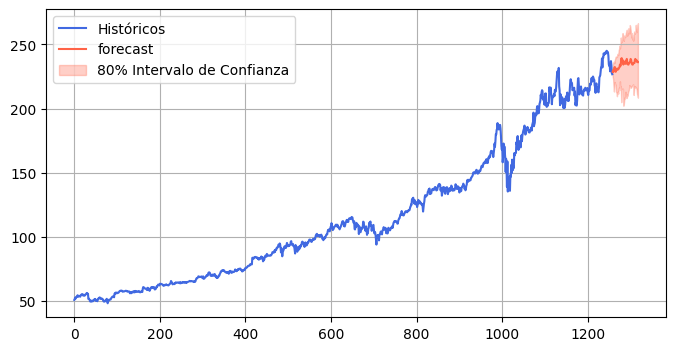

In [ ]:
# visualizar el forecast

forecast_index = range(len(st), len(st) + horizonte)
low, median, high = np.quantile(forecast[0].numpy(), [0.1, 0.5, 0.9], axis=0)

plt.figure(figsize=(8, 4))
plt.plot(st['Close'], color="royalblue", label="Históricos")
plt.plot(forecast_index, median, color="tomato", label="forecast")
plt.fill_between(forecast_index, low, high, color="tomato", alpha=0.3, label="80% Intervalo de Confianza")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# completar el forecast

fcst = pd.DataFrame()
fcst['inferior'] = low
fcst['forecast'] = median
fcst['superior'] = high
fcst

,inferior,forecast,superior
0,224.830185,228.598285,231.361558
1,223.322943,229.854319,235.255262
2,217.168362,228.598285,236.260088
3,213.274659,230.482335,236.636898
4,218.424395,231.738368,235.380865
5,220.685255,232.366385,237.767328
6,218.298792,230.482335,239.148965
7,218.549998,228.598285,240.405000
8,212.772245,229.854319,240.153792
9,212.269832,229.854319,240.405000


In [ ]:
# agregar fecha al forecast
fcst['Date'] = pd.date_range(start='2021-03-05', periods = len(fcst), freq='B')

In [ ]:
fcst

,inferior,forecast,superior,Date
0,224.830185,228.598285,231.361558,2021-03-05
1,223.322943,229.854319,235.255262,2021-03-08
2,217.168362,228.598285,236.260088,2021-03-09
3,213.274659,230.482335,236.636898,2021-03-10
4,218.424395,231.738368,235.380865,2021-03-11
5,220.685255,232.366385,237.767328,2021-03-12
6,218.298792,230.482335,239.148965,2021-03-15
7,218.549998,228.598285,240.405000,2021-03-16
8,212.772245,229.854319,240.153792,2021-03-17
9,212.269832,229.854319,240.405000,2021-03-18


<Axes: >

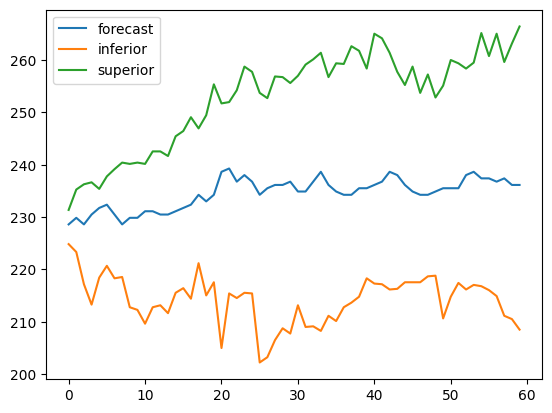

In [ ]:
fcst[['forecast', 'inferior', 'superior']].plot()

In [ ]:
# concatenar dataframes historico y forecast
df_consolidado = pd.concat([df, fcst]).fillna(0)
df_consolidado

,Date,Open,High,Low,Close,Adj Close,Volume,inferior,forecast,superior
0,2016-03-07,51.560001,51.799999,50.580002,51.029999,46.793064,38407800.0,0.000000,0.000000,0.000000
1,2016-03-08,50.799999,52.130001,50.599998,51.650002,47.361591,33835100.0,0.000000,0.000000,0.000000
2,2016-03-09,51.889999,52.849998,51.860001,52.840000,48.452789,28251600.0,0.000000,0.000000,0.000000
3,2016-03-10,52.930000,52.939999,51.160000,52.049999,47.728374,38387800.0,0.000000,0.000000,0.000000
4,2016-03-11,53.000000,53.070000,52.380001,53.070000,48.663696,32275700.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
55,2021-05-21 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,216.037932,237.390518,260.752760
56,2021-05-24 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,214.907502,236.762502,265.023271
57,2021-05-25 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,211.139400,237.390518,259.622330
58,2021-05-26 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,210.511383,236.134485,263.139223


In [ ]:
# exportar datos
df_consolidado.to_csv('forecast_msft_consolidado.csv')